In [52]:
! pip install -q yfinance

In [53]:
import yfinance

In [54]:
tickers = ['MSFT', 'AAPL', 'NVO', 'NATH']

In [ ]:
data = yfinance.download(tickers, period='1y', rounding=True,)
for ticker in data['Close'].columns:
    # Daily price change
    data['Daily Change (%)', ticker] = data['Close'][ticker].pct_change() * 100
    # 30-day price change
    data['30-Day Change (%)', ticker] = (data['Close'][ticker] / data['Close'][ticker].shift(30) - 1) * 100
    # 1-year price change
    data['1-Year Change (%)', ticker] = (data['Close'][ticker] / data['Close'][ticker].shift(252) - 1) * 100
    # Add Year-to-Date (YTD) Change for each ticker
    for ticker in data['Close'].columns:
        # Get the first trading day of the year for each ticker
        first_day_price = data['Close'][ticker].loc[data.index[data.index.year == data.index[-1].year].min()]
        # Calculate YTD change
        data['Year-To-Date (YTD) Change (%)', ticker] = (data['Close'][ticker] / first_day_price - 1) * 100

data.to_csv('data.csv', index=True)
data

[*********************100%***********************]  4 of 4 completed


Price        Close                           High                         \
Ticker        AAPL    MSFT   NATH     NVO    AAPL    MSFT   NATH     NVO   
Date                                                                       
2024-01-02  184.73  368.85  75.37  101.00  187.52  373.86  75.39  101.51   
2024-01-03  183.35  368.59  73.92  102.49  184.97  371.23  75.52  102.71   
2024-01-04  181.02  365.94  73.85  106.46  182.20  371.07  74.25  107.80   
2024-01-05  180.30  365.75  73.25  104.83  181.87  370.04  74.00  106.03   
2024-01-08  184.66  372.65  72.31  105.24  184.70  373.16  72.31  105.38   
...            ...     ...    ...     ...     ...     ...    ...     ...   
2024-12-24  258.20  439.33  80.13   87.37  258.21  439.60  80.13   88.98   
2024-12-26  259.02  438.11  79.96   87.65  260.10  440.94  80.39   88.06   
2024-12-27  255.59  430.53  78.96   87.37  258.70  435.22  79.45   88.77   
2024-12-30  252.20  424.83  79.18   85.73  253.50  427.55  80.40   87.01   
2024-12-31  250.42  421.50  78.61   86.02  253.28  426.73  79.50   86.05   

Price          Low          ... Year-To-Date (YTD) Change (%)  \
Ticker        AAPL    MSFT  ...                           NVO   
Date                        ...                                 
2024-01-02  182.99  364.78  ...                      0.000000   
2024-01-03  182.54  366.51  ...                      1.475248   
2024-01-04  180.00  365.17  ...                      5.405941   
2024-01-05  179.29  364.51  ...                      3.792079   
2024-01-08  180.62  367.00  ...                      4.198020   
...            ...     ...  ...                           ...   
2024-12-24  255.29  434.19  ...                    -13.495050   
2024-12-26  257.63  436.63  ...                    -13.217822   
2024-12-27  253.06  426.35  ...                    -13.495050   
2024-12-30  250.75  421.90  ...                    -15.118812   
2024-12-31  249.43  420.66  ...                    -14.831683   

Price      Daily Change (%) 30-Day Change (%) 1-Year Change (%)  \
Ticker                 MSFT              MSFT              MSFT   
Date                                                              
2024-01-02              NaN               NaN               NaN   
2024-01-03        -0.070489               NaN               NaN   
2024-01-04        -0.718956               NaN               NaN   
2024-01-05        -0.051921               NaN               NaN   
2024-01-08         1.886535               NaN               NaN   
...                     ...               ...               ...   
2024-12-24         0.937392          5.100356               NaN   
2024-12-26        -0.277696          3.564759               NaN   
2024-12-27        -1.730159          1.253528               NaN   
2024-12-30        -1.323950         -0.482560               NaN   
2024-12-31        -0.783843          1.566265               NaN   

Price      Daily Change (%) 30-Day Change (%) 1-Year Change (%)  \
Ticker                 NATH              NATH              NATH   
Date                                                              
2024-01-02              NaN               NaN               NaN   
2024-01-03        -1.923842               NaN               NaN   
2024-01-04        -0.094697               NaN               NaN   
2024-01-05        -0.812458               NaN               NaN   
2024-01-08        -1.283276               NaN               NaN   
...                     ...               ...               ...   
2024-12-24         0.438706        -14.391026               NaN   
2024-12-26        -0.212155        -12.228321               NaN   
2024-12-27        -1.250625         -9.522173               NaN   
2024-12-30         0.278622         -7.229057               NaN   
2024-12-31        -0.719879         -7.157199               NaN   

Price      Daily Change (%) 30-Day Change (%) 1-Year Change (%)  
Ticker                  NVO               NVO               NVO  
Date          

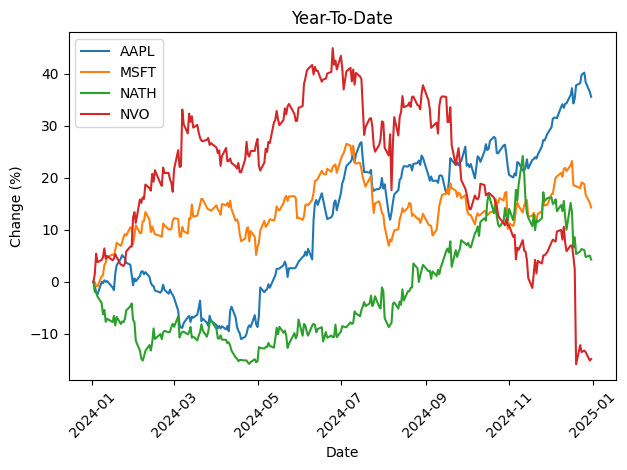

In [56]:
import matplotlib.pyplot as plt

for ticker in data['Year-To-Date (YTD) Change (%)'].columns:
    plt.plot(data.index, data['Year-To-Date (YTD) Change (%)'][ticker], label=ticker)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Change (%)')
plt.title('Year-To-Date')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()
